 <a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
1. [Load packages](#2)
    1. [import](#21)
    1. [Setup](#22)
    1. [Version](#23)
1. [Problem Definition](#3)
    1. [Problem Feature](#31)
    1. [Aim](#32)
    1. [Variables](#33)
    1. [Evaluation](#34)
1. [Exploratory Data Analysis(EDA)](#4)
    1. [Data Collection](#41)
    1. [Data Preprocessing](#42)
    1. [Visualization](#43)
1. [Process ML Models](#5)
    1. [Linear Regression](#51)
    1. [Random Forest Regression](#54)
    1. [Xgboost](#55)
    1. [LGBM Regressor](#53)
    1. [Ridge Model](#52)
    1. [Gradient Boosting Regression](#56)
1. [Blending + Submission](#6)


<a id="1"></a> <br>
# 1-Introduction


We could manage to access a mining database with exploration data related to the quality of phosphate ore in Morocco.  
Data has all been modified due to confidentiality issues, but be sure that at the end your model will be used on the real dataset by OCP teams. 
In this dataset we will have multiple information about extracted rock, both geographical information and different material contents that are measured in the mine labs. If we can predict how much P2O5 (BPL_B) is in the ore without waiting for the lab results each time, we can help the engineers by giving them early information to take action. Hence, they will be able to take corrective actions in advance and help the environment.
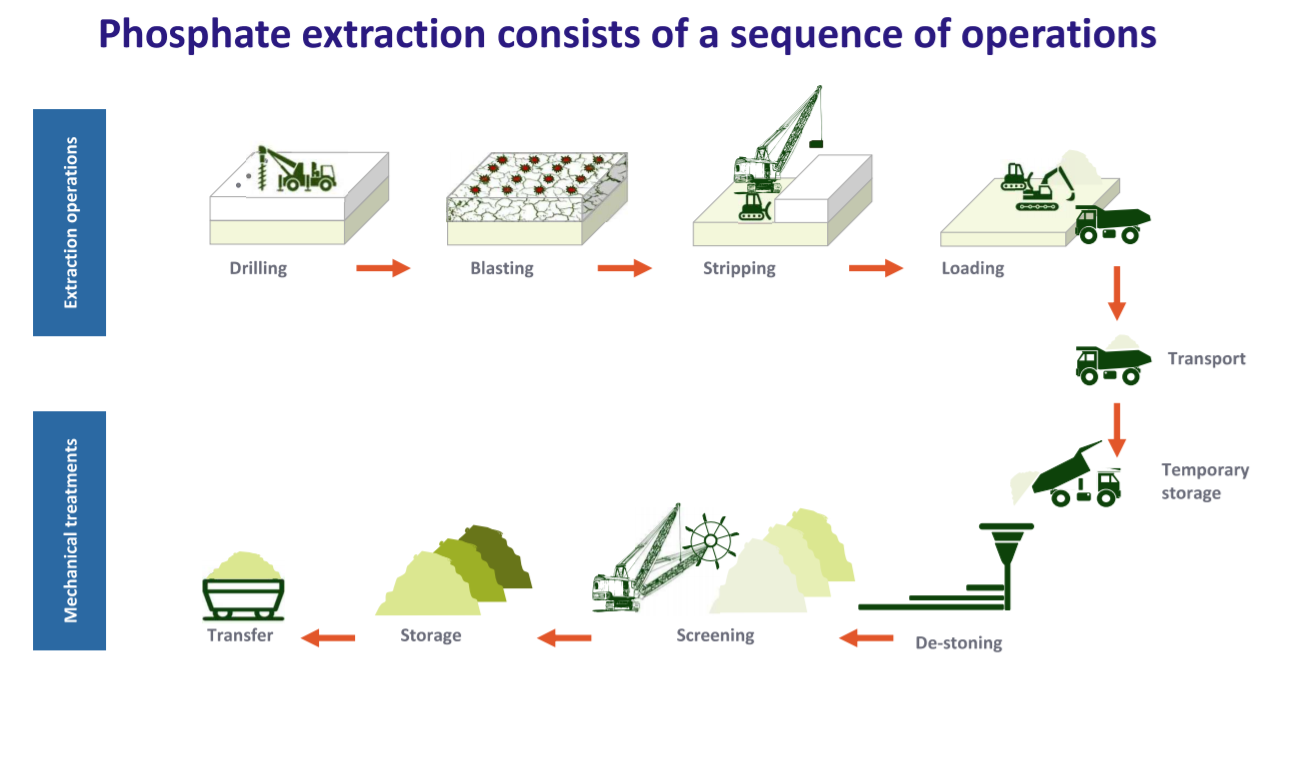

 <a id="2"></a> <br>
 ## 2- Load packages
  <a id="21"></a> <br>
## 2-A Import

In [5]:
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from sklearn import ensemble
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import eli5
import sys
%matplotlib inline


 <a id="23"></a> <br>
## 2-C Version

In [3]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

pandas: 1.0.5
numpy: 1.18.5
Python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


 <a id="3"></a> <br>
 ## 3- Problem Definition

Our mission is to build a strong prediction tool using EDA, supervised and unsupervised learning algorithmes.

<a id="31"></a> 
### 3-1 Problem Feature

1. **x_train** - input data of the training set
1. **y_train** - output data of the training set
1. **x_test** - input data of the testing set

<a id="32"></a> 
### 3-2 Aim
In this challenge, the task is to predict the value of **P2O5 (BPL_B)** column for the x_test set.

<a id="33"></a> 
### 3-3 Variables

We are provided with a **dataset containing numeric feature variables**, the numeric **P2O5 (BPL_B)** column, and a numeric **OBJECTID** column.

The task is to predict the value of **BPL_B column** for the test set.

<a id="34"></a> 
## 3-4 evaluation

**Submissions** are evaluated using the RMSE metric.

In [4]:
from sklearn.metrics import mean_squared_log_error


<a id="4"></a> 
## 4- Exploratory Data Analysis(EDA)
 In this section, we'll analysis how to use graphical and numerical techniques to begin uncovering the structure of your data. 
*  Data Collection
*  Visualization
*  Data Preprocessing
*  Data Cleaning
<img src="https://miro.medium.com/max/1130/1*3sr-fMg4S_yEncGsIjyG9A.png" width=400 height=400>

 <a id="41"></a> <br>
## 4-1 Data Collection

In [7]:
df=pd.read_csv("train.csv", decimal=",")
dft=pd.read_csv("test.csv", decimal=",")
df.head(10)


# output variable "BPL_B"

,Unnamed: 0,OBJECTID,CMM,CM,TYPE_,NIVEAU,GISEMENT,TRANCHE,ZONE_,RAPPORT_MIN,...,MGO_L,CD_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,Th_B,ORDRE,OBS
0,1,1,CMM1,CM698,GEOCHIMIE,Niveau 1,G1,T1,NaN,0,...,0.248500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.998286,0
1,3,3,CMM3,CM705,GEOCHIMIE,Niveau 1,G1,T2,NaN,0,...,0.334190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.998286,0
2,6,6,CMM6,CM944,GEOCHIMIE,Niveau 1,G1,T3,NaN,0,...,7.754927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.998286,0
3,7,7,CMM1,CM698,GEOCHIMIE,Niveau 2,G1,T1,NaN,0,...,0.471294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.425878,0
4,9,9,CMM7,CM703,GEOCHIMIE,Niveau 2,G1,T1,NaN,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.425878,0
5,10,10,CMM3,CM705,GEOCHIMIE,Niveau 2,G1,T2,NaN,0,...,0.377035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.425878,0
6,12,12,CMM8,CM940,GEOCHIMIE,Niveau 2,G1,T2,NaN,0,...,0.282776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.425878,0
7,13,13,CMM9,CM941,GEOCHIMIE,Niveau 2,G1,T4,NaN,0,...,0.719794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.425878,0
8,14,14,CMM5,CM942,GEOCHIMIE,Niveau 2,G1,T5,NaN,0,...,1.328192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.425878,0
9,15,15,CMM1,CM698,GEOCHIMIE,Niveau 3,G1,T1,NaN,0,...,0.308483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.996572,0


 <a id="42"></a> <br>
## 4-2 Data Preprocessing

 <a id="421"></a> <br>
## 4-2-1 Check missing data 

In [8]:
#shape of datasets
print("data shape : " +  str(df.shape))

data shape : (10716, 50)


In [9]:
100*df.isnull().sum()/len(df)

Unnamed: 0       0.000000
OBJECTID         0.000000
CMM              0.000000
CM               0.000000
TYPE_            0.000000
NIVEAU           0.000000
GISEMENT         0.000000
TRANCHE         38.755133
ZONE_            9.873087
RAPPORT_MIN      0.000000
MINR_PASSANT     0.000000
X                0.000000
Y                0.000000
Z                0.000000
PT               0.000000
PP               0.000000
BPL_B            0.000000
RP               0.000000
CO2_B            0.000000
CAO_B            0.000000
SIO2_B           0.000000
FE2O3_B          0.000000
AL2O3_B          0.000000
F_B              0.000000
CORG_B           0.000000
NA2O_B           0.000000
K2O_B            0.000000
MGO_B            0.000000
CD_B             0.000000
U_B              0.000000
AS_B             0.000000
V_B              0.000000
ZN_B             0.000000
TI_B             0.000000
TR_B             0.000000
SR_B             0.000000
CL_B             0.000000
Mo_B             0.000000
Cr_B        

In [10]:
df['CD_L'].value_counts()

0.000000     10353
5.141388        30
7.712082        25
5.998286        24
10.282776       20
             ...  
49.700086        1
10.676949        1
59.982862        1
7.514996         1
9.520137         1
Name: CD_L, Length: 84, dtype: int64

##### let's see which of the values are missing

Your selected dataframe has 48 columns.



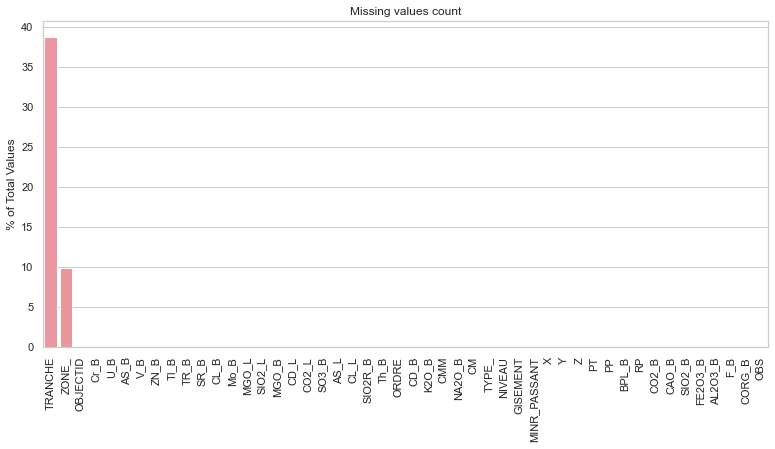

,Missing Values,% of Total Values,type
TRANCHE,4153,38.8,object
ZONE_,1058,9.9,object
OBJECTID,0,0.0,int64
Cr_B,0,0.0,float64
U_B,0,0.0,float64
AS_B,0,0.0,float64
V_B,0,0.0,float64
ZN_B,0,0.0,float64
TI_B,0,0.0,float64
TR_B,0,0.0,float64


In [13]:
missing_values_table(df)

In [12]:
#we delete the first column (index), Rapport_MIN
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('RAPPORT_MIN', axis=1, inplace=True)

In [10]:
df['CM'].value_counts()/len(df)*100

CM1801    0.233296
CM1237    0.223964
CM928     0.214632
CM1755    0.214632
CM1377    0.205300
            ...   
CM253     0.009332
CM1255    0.009332
CM310     0.009332
CM725     0.009332
CM719     0.009332
Name: CM, Length: 1807, dtype: float64

In [11]:
df['MINR_PASSANT'] = df['MINR_PASSANT'].replace({'mm':''}, regex = True)
df['MINR_PASSANT'].value_counts()

0              8871
10              793
6,3             739
10  et 6,3      142
10               89
6,3  et 10       82
Name: MINR_PASSANT, dtype: int64

In [12]:
df['MINR_PASSANT'] = df['MINR_PASSANT'].replace({'6,3 10':'6.3 10'}, regex = True)
df['MINR_PASSANT'].value_counts()

0              8871
10              793
6,3             739
10  et 6,3      142
10               89
6,3  et 10       82
Name: MINR_PASSANT, dtype: int64

In [13]:
df['CAO_B'].value_counts()

0.000000     9581
43.247644      59
43.487575      55
43.967438      45
43.727506      43
             ... 
38.706084       1
40.137104       1
42.356470       1
42.690660       1
35.312768       1
Name: CAO_B, Length: 530, dtype: int64

In [14]:
df.head()

,OBJECTID,CMM,CM,TYPE_,NIVEAU,GISEMENT,TRANCHE,ZONE_,MINR_PASSANT,X,...,MGO_L,CD_L,CO2_L,SO3_B,AS_L,CL_L,SIO2R_B,Th_B,ORDRE,OBS
0,1,CMM1,CM698,GEOCHIMIE,Niveau 1,G1,T1,NaN,0,262872.4336,...,0.248500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.998286,0
1,3,CMM3,CM705,GEOCHIMIE,Niveau 1,G1,T2,NaN,0,295684.5844,...,0.334190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.998286,0
2,6,CMM6,CM944,GEOCHIMIE,Niveau 1,G1,T3,NaN,0,275408.0120,...,7.754927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.998286,0
3,7,CMM1,CM698,GEOCHIMIE,Niveau 2,G1,T1,NaN,0,262872.4336,...,0.471294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.425878,0
4,9,CMM7,CM703,GEOCHIMIE,Niveau 2,G1,T1,NaN,0,292263.4876,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.425878,0


In [73]:
#variable zone
print("% of zone :\n")
#print(100*df['ZONE_'].value_counts()/df['ZONE_'].count())
df['ZONE_'].value_counts()

% of zone :



Zone9     1806
Zone3     1801
Zone1     1122
Zone12     658
Zone17     612
Zone15     560
Zone10     548
Zone11     475
Zone19     447
Zone14     425
Zone16     384
Zone13     202
Zone6      149
Zone2      137
Zone7       93
Zone5       61
Zone8       55
Zone25      48
Zone18      35
Zone21      20
Zone4        7
Zone24       7
Zone23       2
Zone20       2
Zone22       2
Name: ZONE_, dtype: int64

In [4]:
#2 solutions, whether to fill most dominant value, or fill with new zone
df['ZONE_'].fillna('zoneUnknown',inplace=True)
dft['ZONE_'].fillna('zoneUnknown',inplace=True)

In [75]:
df['ZONE_'].value_counts()

Zone9          1806
Zone3          1801
Zone1          1122
zoneUnknown    1058
Zone12          658
Zone17          612
Zone15          560
Zone10          548
Zone11          475
Zone19          447
Zone14          425
Zone16          384
Zone13          202
Zone6           149
Zone2           137
Zone7            93
Zone5            61
Zone8            55
Zone25           48
Zone18           35
Zone21           20
Zone4             7
Zone24            7
Zone22            2
Zone23            2
Zone20            2
Name: ZONE_, dtype: int64

In [76]:
#variable Tranche
print("% of tranche :\n")
print(100*df['TRANCHE'].value_counts()/df['TRANCHE'].count())

% of tranche :

T1    40.941643
T2    29.300625
T3    19.305196
T4    10.208746
T5     0.243791
Name: TRANCHE, dtype: float64


In [5]:
#We fill with most frequent value T1
df['TRANCHE'].fillna(df['TRANCHE'].value_counts().index[0],inplace=True)
dft['TRANCHE'].fillna(df['TRANCHE'].value_counts().index[0],inplace=True)# df['TRANCHE'].value_counts().index[0] ===== 'T1'

In [78]:
#variable types
df.dtypes

OBJECTID          int64
CMM              object
CM               object
TYPE_            object
NIVEAU           object
GISEMENT         object
TRANCHE          object
ZONE_            object
MINR_PASSANT     object
X               float64
Y               float64
Z               float64
PT              float64
PP              float64
BPL_B           float64
RP              float64
CO2_B           float64
CAO_B           float64
SIO2_B          float64
FE2O3_B         float64
AL2O3_B         float64
F_B             float64
CORG_B          float64
NA2O_B          float64
K2O_B           float64
MGO_B           float64
CD_B            float64
U_B             float64
AS_B            float64
V_B             float64
ZN_B            float64
TI_B            float64
TR_B            float64
SR_B            float64
CL_B            float64
Mo_B            float64
Cr_B            float64
SIO2_L          float64
MGO_L           float64
CD_L            float64
CO2_L           float64
SO3_B           

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      10716 non-null  int64  
 1   CMM           10716 non-null  object 
 2   CM            10716 non-null  object 
 3   TYPE_         10716 non-null  object 
 4   NIVEAU        10716 non-null  object 
 5   GISEMENT      10716 non-null  object 
 6   TRANCHE       10716 non-null  object 
 7   ZONE_         10716 non-null  object 
 8   MINR_PASSANT  10716 non-null  object 
 9   X             10716 non-null  float64
 10  Y             10716 non-null  float64
 11  Z             10716 non-null  float64
 12  PT            10716 non-null  float64
 13  PP            10716 non-null  float64
 14  BPL_B         10716 non-null  float64
 15  RP            10716 non-null  float64
 16  CO2_B         10716 non-null  float64
 17  CAO_B         10716 non-null  float64
 18  SIO2_B        10716 non-nu

In [28]:
#Convert to float
#df['BPL_B'] = pd.to_numeric(df['BPL_B'].str.replace(',','.'), errors='coerce')
#df['MGO_L'] = pd.to_numeric(df['MGO_L'].str.replace(',','.'), errors='coerce')

 <a id="43"></a> <br>
## 4-3 Visualization

### Missing & highly correlated values

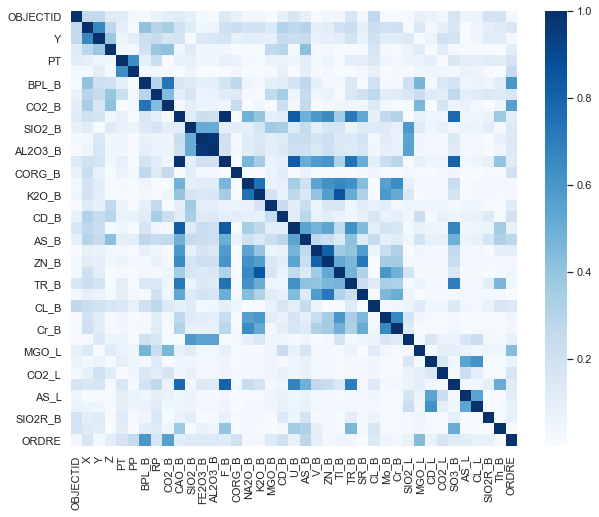

In [22]:
## Remove Highly Correlated Variable
corr = df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap="Blues")

In [23]:
#zoom on most correlated elements
corr = df.corr().abs()
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of sol series is the pair with the bigest correlation
sol[:20]

CAO_B    F_B        0.989114
FE2O3_B  AL2O3_B    0.973677
K2O_B    TI_B       0.863348
F_B      U_B        0.833577
CAO_B    U_B        0.830666
V_B      ZN_B       0.811359
F_B      SO3_B      0.806955
CAO_B    SO3_B      0.783746
NA2O_B   K2O_B      0.752196
F_B      TR_B       0.742232
BPL_B    CO2_B      0.737601
ZN_B     SR_B       0.727930
CAO_B    TR_B       0.719966
TR_B     SO3_B      0.699483
U_B      SO3_B      0.677651
NA2O_B   TI_B       0.667302
X        Y          0.664798
Mo_B     Cr_B       0.656898
CAO_B    ZN_B       0.652352
NA2O_B   Cr_B       0.646508
dtype: float64

In [24]:
correlations = corr["BPL_B"].sort_values(ascending=False)
features = correlations.index[0:10]
features

Index(['BPL_B', 'CO2_B', 'ORDRE', 'MGO_L', 'X', 'RP', 'AS_B', 'CORG_B', 'Y',
       'SIO2_L'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


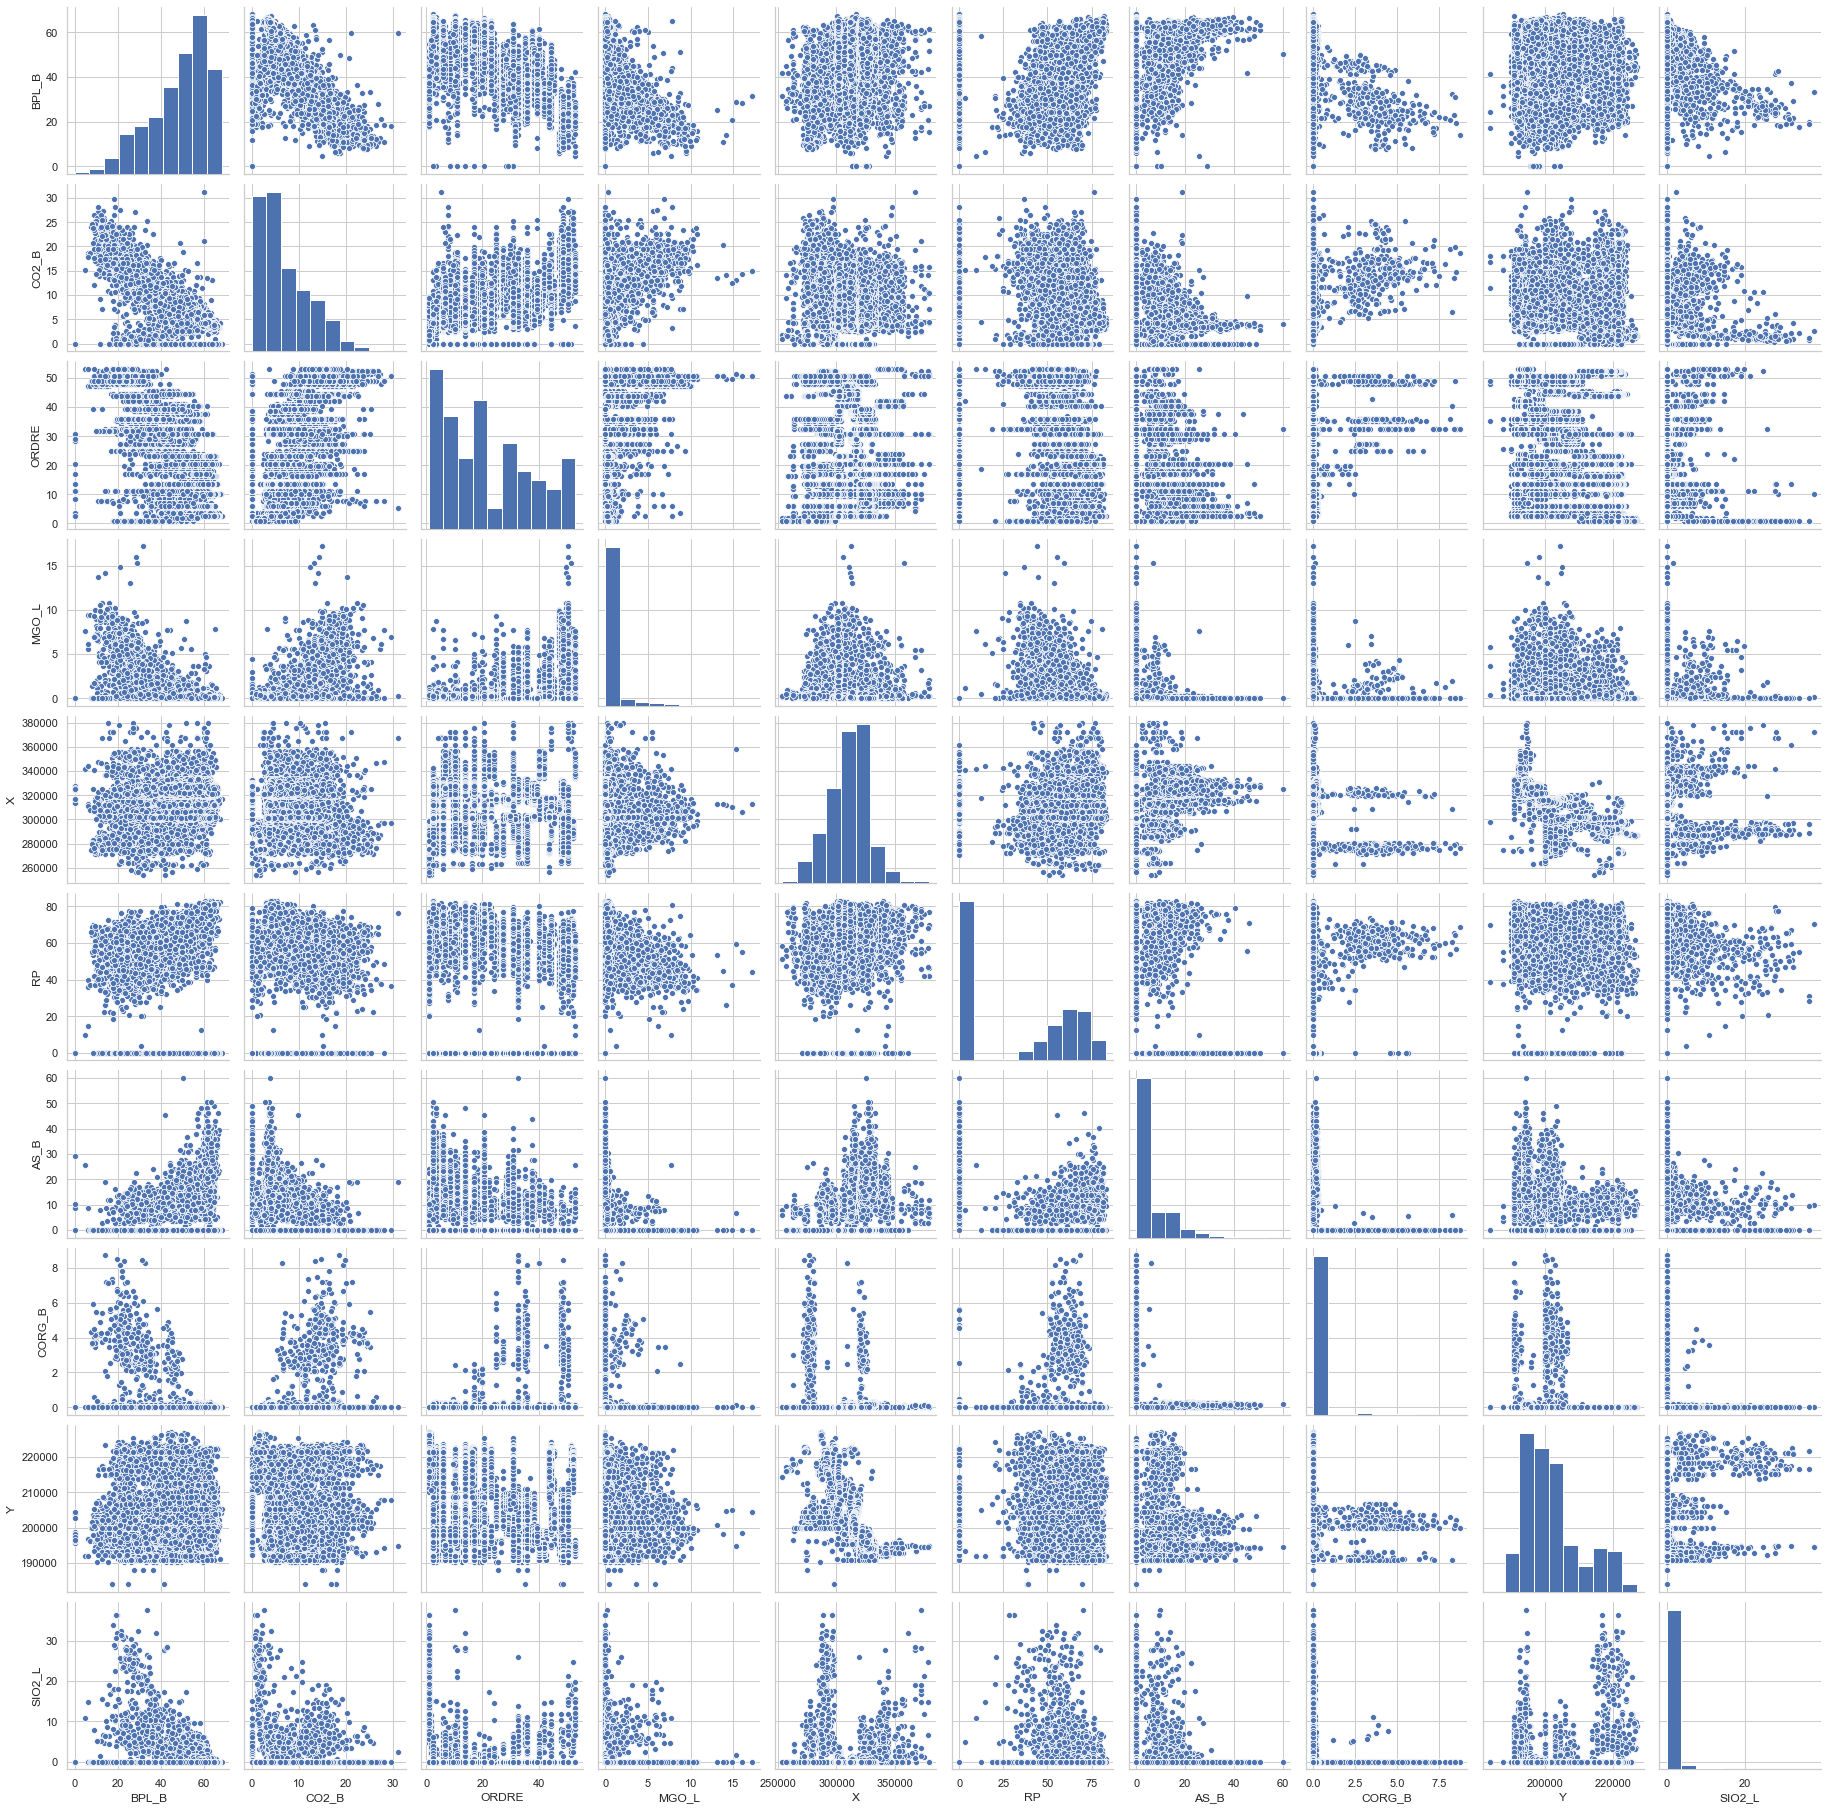

In [25]:
sns.pairplot(df[features], size = 2.5)
plt.show();

<a id="5"></a> 
## 5- Process : ML Models

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from pdpbox import pdp, get_dataset, info_plots
from sklearn import ensemble
from eli5.sklearn import PermutationImportance

In [49]:
""""
#SPLIT DATA
Id_col='X'
target_col='BPL_B'

##seperating dependent and independent variables
cols    = [i for i in df.columns if i not in Id_col + target_col]
X = df[cols]
y = df[target_col]


In [66]:
df['TYPE']=df.TYPE_.map({'GEOCHIMIE':0,'MINERALURGIE':1})

In [217]:
dft.head()

,OBJECTID,ZONE_,X,Y,Z,PT,PP,RP,CO2_B,CAO_B,...,GISEMENT_G9,TRANCHE_T2,TRANCHE_T3,TRANCHE_T4,TRANCHE_T5,MINR_PASSANT_10 mm,"MINR_PASSANT_10 mm et 6,3 mm",MINR_PASSANT_10mm,"MINR_PASSANT_6,3 mm","MINR_PASSANT_6,3 mm et 10 mm"
0,2,zoneUnknown,273605.3470,190830.1799,449.357326,1.242502,1.242502,59.502999,9.254499,37.326478,...,0,1,0,0,0,0,0,0,0,0
1,4,zoneUnknown,282233.4961,196138.7061,490.162811,0.728363,0.728363,59.682948,8.183376,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,5,zoneUnknown,285754.2845,190201.5853,467.437875,0.428449,0.428449,55.578406,9.477292,0.000000,...,0,0,0,0,1,0,0,0,0,0
3,8,zoneUnknown,273605.3470,190830.1799,449.357326,0.556984,0.556984,71.405313,3.881748,40.222793,...,0,1,0,0,0,0,0,0,0,0
4,11,zoneUnknown,282233.4961,196138.7061,490.162811,0.128535,0.128535,62.562125,8.997429,0.000000,...,0,0,1,0,0,0,0,0,0,0


In [7]:
df = pd.get_dummies(df,columns=['TYPE_', 'NIVEAU', 'GISEMENT','TRANCHE','MINR_PASSANT'] , drop_first=True)
#dft = pd.get_dummies(dft,columns=['TYPE_', 'NIVEAU', 'GISEMENT','TRANCHE','MINR_PASSANT'] , drop_first=True)

#### Prepare our data for our model

In [16]:
#X=df[['X','Y','Z','PT','PP','RP','CO2_B','CAO_B','SIO2_B','FE2O3_B', 'AL2O3_B','F_B' ,'CORG_B']]
X_train = df.drop(["BPL_B","OBJECTID","ZONE_"], axis=1)
X_test=dft.drop(["OBJECTID","ZONE_"], axis=1)
y_train=df['BPL_B']

In [8]:
X = df.drop(["BPL_B","OBJECTID","ZONE_"], axis=1)
y=df['BPL_B']
#X_test=dft[["X","Y","Z","PT","PP","RP","CO2_B","CAO_B","SIO2_B","FE2O3_B","AL2O3_B","F_B","CORG_B","NA2O_B","K2O_B","MGO_B","CD_B","U_B","AS_B","V_B","ZN_B","TI_B","TR_B","SR_B","CL_B","Mo_B","Cr_B","SIO2_L","MGO_L","CD_L","CO2_L","SO3_B","AS_L","CL_L","SIO2R_B","Th_B","ORDRE" ]]


In [178]:
X_train

,X,Y,Z,PT,PP,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,...,ZONE__Zone7,ZONE__Zone8,ZONE__Zone9,ZONE__zoneUnknown,MINR_PASSANT_10 mm,"MINR_PASSANT_10 mm et 6,3 mm",MINR_PASSANT_10mm,"MINR_PASSANT_6,3 mm","MINR_PASSANT_6,3 mm et 10 mm",OBS_0
0,262872.4336,196575.5013,476.958012,0.514139,0.514139,71.465296,4.224507,25.381320,5.235647,0.214225,...,0,0,0,1,0,0,0,0,0,1
1,295684.5844,196491.1825,512.956298,0.556984,0.556984,67.514996,7.257926,46.289632,6.246787,0.154242,...,0,0,0,1,0,0,0,0,0,1
2,275408.0120,196147.3693,470.951157,0.685518,0.685518,60.119966,9.468723,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
3,262872.4336,196575.5013,476.958012,0.257069,0.257069,66.221080,8.449015,23.281919,6.529563,0.162811,...,0,0,0,1,0,0,0,0,0,1
4,292263.4876,195937.1979,483.033419,0.514139,0.471294,67.009426,5.544130,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10711,272286.2811,221395.7241,557.900600,0.171380,0.171380,69.725793,13.778920,40.951157,4.361611,0.239931,...,0,0,0,0,0,0,0,0,0,1
10712,279848.4062,208567.4979,506.769494,0.599829,0.599829,76.529563,6.075407,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
10713,262533.7104,217906.7438,521.396744,0.257069,0.257069,78.886033,4.198800,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
10714,272659.8115,221639.1260,556.263925,0.428449,0.428449,80.796915,4.498715,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [179]:
X_test

,X,Y,Z,PT,PP,RP,CO2_B,CAO_B,SIO2_B,FE2O3_B,...,ZONE__Zone7,ZONE__Zone8,ZONE__Zone9,ZONE__zoneUnknown,MINR_PASSANT_10 mm,"MINR_PASSANT_10 mm et 6,3 mm",MINR_PASSANT_10mm,"MINR_PASSANT_6,3 mm","MINR_PASSANT_6,3 mm et 10 mm",OBS_0
0,273605.3470,190830.1799,449.357326,1.242502,1.242502,59.502999,9.254499,37.326478,9.785775,0.265638,...,0,0,0,1,0,0,0,0,0,1
1,282233.4961,196138.7061,490.162811,0.728363,0.728363,59.682948,8.183376,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
2,285754.2845,190201.5853,467.437875,0.428449,0.428449,55.578406,9.477292,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
3,273605.3470,190830.1799,449.357326,0.556984,0.556984,71.405313,3.881748,40.222793,6.332476,0.205656,...,0,0,0,1,0,0,0,0,0,1
4,282233.4961,196138.7061,490.162811,0.128535,0.128535,62.562125,8.997429,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,279848.4062,208567.4979,506.769494,0.514139,0.514139,78.337618,5.475578,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
4590,272659.8115,221639.1260,556.263925,0.514139,0.514139,74.018852,13.496144,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
4591,264097.3093,218069.7601,520.368466,1.242502,0.814053,70.839760,6.315338,34.387318,13.239075,0.497001,...,0,0,0,0,0,0,0,0,0,1
4592,274767.0009,212524.6787,533.778920,0.342759,0.342759,44.198800,4.335904,43.718937,2.030848,0.154242,...,0,0,0,0,0,0,0,0,0,1


In [80]:
#X=pd.get_dummies(data=X, drop_first=True)  

### Splitting into Validation

Try to split our training data again into validation sets. This will help us evaluate our model performance and maybe avoid overfitting.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25 ,random_state = 111)

<a id="51"></a> 
## 5-1 Linear Regression Model

In [267]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [113]:
# print the intercept
print(model.intercept_)

-49.91408116124524


In [114]:
coeff_parameter = pd.DataFrame(model.coef_,X_train.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
X,0.000150
Y,-0.000019
Z,-0.007529
PT,-0.511508
PP,-0.122445
...,...
"MINR_PASSANT_10 mm et 6,3 mm",-5.561662
MINR_PASSANT_10mm,3.559976
"MINR_PASSANT_6,3 mm",6.205935
"MINR_PASSANT_6,3 mm et 10 mm",-3.241828


In [268]:
predictions = model.predict(X_test)
predictions

array([41.71387409, 45.28993208, 42.59517043, ..., 50.04323568,
       54.37045489, 54.43134485])

In [116]:
model.score(X_test, y_test)

0.9053783603109379

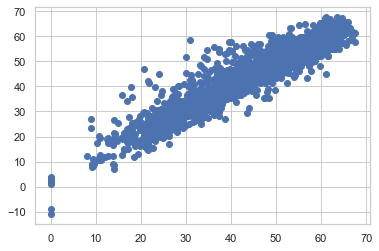

In [117]:
plt.scatter(y_test,predictions)

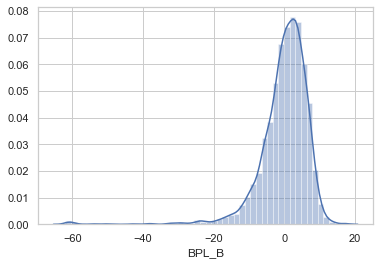

In [90]:
sns.distplot((y_test-predictions),bins=50);

In [118]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.9690800388736323
MSE: 17.137364982691945
RMSE: 4.139730061573091


<a id="54"></a> 
## 5-2 Random Forest Regression

In [10]:
rfr = RandomForestRegressor(n_estimators = 20, criterion = "mse" , min_samples_split = 2, max_features = "auto")
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

In [11]:
rfc_model = RandomForestRegressor(random_state=0).fit(X_train, y_train)

In [12]:
predictions = rfc_model.predict(X_test)

rf_pred = rfr.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
rmsle_rf = mean_squared_log_error(y_test, rf_pred)
y_pred =  rfr.predict(X_test)
print("R^2 Score: " + str(r2_rf))
print("RMSLE Score: " + str(rmsle_rf)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))


R^2 Score: 0.9164031080219186
RMSLE Score: 0.035639131028757175
Root Mean Squared Error: 3.89109517741753


In [229]:
y_pred =  rfr.predict(X_test)

<a id="55"></a> 
## 5-3 Xgboost

In [13]:
xgboost = XGBRegressor(learning_rate=0.3,n_estimators=200,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb = xgboost.fit(X_train, y_train)

[15:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
xgb_pred = xgb.predict(X_test)
xgb_pred = np.fmax(0,xgb_pred)
r2_xgb = r2_score(y_test, xgb_pred)
rmsle_xgb = mean_squared_log_error(y_test, xgb_pred)
print("R^2 Score: " + str(r2_xgb))
print("RMSLE Score: " + str(rmsle_xgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

R^2 Score: 0.9210621240227561
RMSLE Score: 0.03858593112543143
Root Mean Squared Error: 3.7811116931209248


In [235]:
xgb_pred = xgb.predict(X_test)
xgb_pred = np.fmax(0,xgb_pred)

<a id="53"></a> 
## 5-4 LGBM Regressor

In [15]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=6,
                                       learning_rate=0.6, 
                                       n_estimators=1500,
                                       max_bin=100, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
gbm = lightgbm.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LightGBMError: Do not support special JSON characters in feature name.

In [37]:
gbm_pred = gbm.predict(X_test)
gbm_pred = np.fmax(0,gbm_pred)
r2_gbm = r2_score(y_test, gbm_pred)
rmsle_gbm = mean_squared_log_error(y_test, gbm_pred)
print("R^2 Score: " + str(r2_gbm))
print("RMSLE Score: " + str(rmsle_gbm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gbm_pred)))

R^2 Score: 0.910612438504532
RMSLE Score: 0.031560470918995866
Root Mean Squared Error: 4.039446155228207


<a id="52"></a> 
## 5-5 Ridge Model

In [265]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_train, y_train)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Ridge Model: Ridge(fit_intercept=False, normalize=True)
Best Score: 0.5505246647490398


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished


In [127]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
#ridge_pred = np.fmax(0,ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

print("R^2 Score: " + str(r2_ridge))


R^2 Score: 0.9051451212076845


In [128]:
scores_ridge = cross_val_score(ridge, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: -18.178672832031257


In [129]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

Root Mean Squared Error: 4.144829067744527


In [266]:
ridge = grid_ridge.best_estimator_
ridge_pred = ridge.predict(X_test)

<a id="56"></a> 
## 5-6 Gradient Boosting Regression

In [16]:
params = {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [17]:
clf_pred=clf.predict(X_test)
#clf_pred= clf_pred.reshape(-1,1)
r2_clf = r2_score(y_test, clf_pred)
print("R^2 Score: " + str(r2_clf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

R^2 Score: 0.9241139839412393
Root Mean Squared Error: 3.707299434955158


In [258]:
clf_pred=clf.predict(X_test)


<a id="6"></a>
# 6. Blending + Submission

In [18]:

ridge.fit(X_train, y_train)
clf.fit(X_train, y_train)
rfr.fit(X_train, y_train)
xgb = xgboost.fit(X_train, y_train)
#gbm = lightgbm.fit(X_train, y_train)

NameError: name 'ridge' is not defined

In [242]:
submission_predictions = blend_models_predict(("OBJECTID":dft["OBJECTID"], "BPL_B":blend_models_predict), axis=1)
submission_predictions = np.exp(submission_predictions)
print(submission_predictions)


SyntaxError: invalid syntax (<ipython-input-242-7bd6df0a09be>, line 1)

In [247]:
rfr.predict(X_test).shape

(4594,)

In [248]:
xgb.predict(X_test).shape

(4594,)

In [259]:
clf.predict(X_test).shape

(4594,)

In [38]:
tot=((0.5* rfr.predict(X_test)) + (0.5 * xgb.predict(X_test))+ (0*clf.predict(X_test)))

In [39]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, tot)))

Root Mean Squared Error: 3.6866515990777047


# Defines functions

In [11]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #types
        types = df.dtypes
        #types.replace({'object': 'str'}, inplace = True)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,types], axis=1)
        
        
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2 : 'type'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
        #[mis_val_table_ren_columns.iloc[:,1] != 0]
       
        
        # Data type
        
        #mis_val_table_ren_columns["type"]=mis_val_table_ren_columns.dtypes
        #mis_val_table_ren_columns["type"].replace({'object': 'str'}, inplace = True)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n")
        
        #add plot
        plt.figure(figsize=(13,6))
        sns.set(style="whitegrid", color_codes=True)
        sns.barplot(x = mis_val_table_ren_columns.index, y = mis_val_table_ren_columns["% of Total Values"], data=mis_val_table_ren_columns)
        plt.xticks(rotation = 90)
        plt.title("Missing values count")
        plt.show()
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [278]:
submission = pd.DataFrame({"OBJECTID":dft["OBJECTID"], "BPL_B":tot})

In [279]:
submission.head(10)

,OBJECTID,BPL_B
0,2,42.936081
1,4,46.755456
2,5,41.243299
3,8,53.088549
4,11,45.432703
5,16,53.133059
6,20,52.703428
7,21,54.116267
8,24,46.537510
9,26,53.157041


In [280]:
filename = 'Rockpred8.csv'
submission.to_csv(filename,index=False)

print('Saved file:'+filename)

Saved file:Rockpred8.csv


In [281]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OBJECTID  4594 non-null   int64  
 1   BPL_B     4594 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 71.9 KB
